# A Geometrical interpolation of least squares

<img src="https://i.stack.imgur.com/T2mQq.gif" width="400" height="400" />

위의 그림은 least squares의 기하학적인 표현이다. 

${A}{X} = {b}$ 라는 문제가 주어졌을 때, error $||b - AX||$를 최소화 시키는 점 b^을 찾아야한다.

이를 기하학적으로 해석하면. b는 col A의 span에서 포함되지 않는 점이다.
이것이 의미하는 바는 error $||b - AX|| = 0 $인 지점은 A의 column space상에 없는 것이다.

그렇다면, error를 최소화하는 지점은 어디일 것인가?

이는 기하학적으로 해석하면, A의 column space상에서 b라는 지점과 가장 가까운 곳은 어디인지 찾는 문제와 같다.

따라서 A의 column space상에서 b와 수직인 점을 찾아야 하며 이는 **least squares**문제이다.

아래는 수식의 전개이다.

$$
{A} ^ {T} {A} \hat{x} = {A}^{T}{b}
$$

여기서 ${A}^{T}{A}$를 취하는면서 square matrix $A^{T}A$의 새로운 linear system으로 해석된다.

만약 square matrix $A^{T}A$가 invertable하다면, 이 식의 해는 $\hat{x} = (A^{T}A)^{-1}A^{T}b$ 이다.


- reference: https://www.edwith.org/linearalgebra4ai/lecture/24799/

In [2]:
import numpy as np

In [4]:
A = np.array([[60, 5.5, 1],
              [65, 5.0, 0],
              [55, 6.0, 1],
              [50, 5.0, 1]])

b = np.array([66, 74, 78, 72])

In [8]:
# 각 x vector에 따른 prediction 및 error
x1 = np.array([-0.12, 16, -9.5])
x2 = np.array([-0.4, 20, -20])

# prediction
y1 = np.dot(A, x1)
y2 = np.dot(A, x2)

print("y1: {}".format(y1))
print("y2: {}".format(y2))

# errors
error1 = np.sqrt(np.sum(np.square(b - y1)))
error2 = np.sqrt(np.sum(np.square(b - y2)))
print("error1: {}".format(error1))
print("error2: {}".format(error2))

y1: [71.3 72.2 79.9 64.5]
y2: [66. 74. 78. 60.]
error1: 9.54934552731233
error2: 12.0


In [9]:
import matplotlib.pyplot as plt

In [11]:
# least squares y ~= ax+b
# input data
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

In [12]:
# concatnate a constant term
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [13]:
# create a matrix A'*A
At_A = A.T.dot(A)
At_A

array([[14.,  6.],
       [ 6.,  4.]])

In [14]:
# create a vector A'*b
At_y = A.T.dot(y)
At_y

array([8.3, 2.2])

In [15]:
# solve for x
from numpy.linalg import solve
c = solve(At_A, At_y)
c

array([ 1.  , -0.95])

In [16]:
# fitted value
y_fitted = A.dot(c)
y_fitted

array([-0.95,  0.05,  1.05,  2.05])

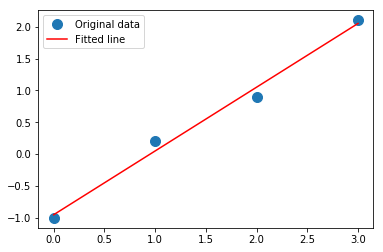

In [17]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, y_fitted, 'r', label='Fitted line')
plt.legend()
plt.show()